## Loading Libraries and Data

In [1]:
# Import necessary libraries
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Load datasets
suppliers = pd.read_excel("Data/MedicalEquipmentSuppliers.xls")
states = pd.read_csv("Data/states.csv")

In [2]:
suppliers.head()

provider_id  acceptsassignement participationbegindate  \
0     20615807                True             2025-07-07   
1     20615153                True             2025-07-07   
2     20615219                True             2025-07-07   
3     20616047                True             2025-07-07   
4     20615921                True             2025-07-07   

                     businessname                    practicename  \
0  SMITHS FOOD & DRUG CENTERS INC            SMITHS PHARMACY #354   
1  SMITHS FOOD & DRUG CENTERS INC             SMITHS PHARMACY #47   
2  SMITHS FOOD & DRUG CENTERS INC  FRY'S FOOD AND DRUG STORE #116   
3  SMITHS FOOD & DRUG CENTERS INC         FRY'S FOOD AND DRUG #48   
4  SMITHS FOOD & DRUG CENTERS INC         FRYS FOOD AND DRUG #112   

       practiceaddress1 practiceaddress2 practicecity practicestate  \
0    3850 E FLAMINGO RD              NaN    LAS VEGAS            NV   
1         2039 E 9400 S              NaN        SANDY            UT   
2           950 FAIR ST              NaN     PRESCOTT            AZ   
3  1385 E FLORENCE BLVD              NaN  CASA GRANDE            AZ   
4      1575 N DYSART RD              NaN     AVONDALE            AZ   

   practicezip9code  telephonenumber        specialitieslist providertypelist  \
0         891216227       7024515536  Pharmacy|Grocery Store              NaN   
1         840933100       8019422227  Pharmacy|Grocery Store              NaN   
2         863051806       9287786887  Pharmacy|Grocery Store              NaN   
3         851225318       5208360901  Pharmacy|Grocery Store              NaN   
4         853231204       6239250851  Pharmacy|Grocery Store              NaN   

                                        supplieslist  latitude  longitude  \
0  Immunosuppressive Drugs|Nebulizer Drugs|Oral A...  36.11640 -115.09056   
1  Immunosuppressive Drugs|Nebulizer Drugs|Oral A...  40.58055 -111.83280   
2  Immunosuppressive Drugs|Nebulizer Drugs|Oral A...  34.55331 -112.48266   
3  Immunosuppressive Drugs|Nebulizer Drugs|Oral A...  32.87947 -111.72816   
4  Immunosuppressive Drugs|Nebulizer Drugs|Oral A...  33.46307 -112.33925   

   is_contracted_for_cba  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False

In [3]:
states.head()

State Uninsured Rate (2010) Uninsured Rate (2015)  \
0    Alabama                  14.6%                 10.1%   
1     Alaska                  19.9%                 14.9%   
2    Arizona                  16.9%                 10.8%   
3   Arkansas                  17.5%                  9.5%   
4  California                 18.5%                  8.6%   

  Uninsured Rate Change (2010-2015)  \
0                            -4.5%    
1                              -5%    
2                            -6.1%    
3                              -8%    
4                            -9.9%    

   Health Insurance Coverage Change (2010-2015)  \
0                                        215000   
1                                         36000   
2                                        410000   
3                                        234000   
4                                       3826000   

   Employer Health Insurance Coverage (2015)  \
0                                    2545000   
1                                     390000   
2                                    3288000   
3                                    1365000   
4                                   19552000   

   Marketplace Health Insurance Coverage (2016)  \
0                                        165534   
1                                         17995   
2                                        179445   
3                                         63357   
4                                       1415428   

   Marketplace Tax Credits (2016) Average Monthly Tax Credit (2016)  \
0                          152206                             $310    
1                           16205                             $750    
2                          124346                             $230    
3                           56843                             $306    
4                         1239893                             $309    

  State Medicaid Expansion (2016)  Medicaid Enrollment (2013)  \
0                           False                    799176.0   
1                            True                    122334.0   
2                            True                   1201770.0   
3                            True                    556851.0   
4                            True                   7755381.0   

   Medicaid Enrollment (2016)  Medicaid Enrollment Change (2013-2016)  \
0                      910775                                111599.0   
1                      166625                                 44291.0   
2                     1716198                                514428.0   
3                      920194                                363343.0   
4                    11843081                               4087700.0   

   Medicare Enrollment (2016)  
0                      989855  
1                       88966  
2                     1175624  
3                      606146  
4                     5829777

## IDA

### Missing Data

In [4]:
suppliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58857 entries, 0 to 58856
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   provider_id             58857 non-null  int64         
 1   acceptsassignement      58857 non-null  bool          
 2   participationbegindate  58857 non-null  datetime64[ns]
 3   businessname            58857 non-null  object        
 4   practicename            58857 non-null  object        
 5   practiceaddress1        58857 non-null  object        
 6   practiceaddress2        13130 non-null  object        
 7   practicecity            58857 non-null  object        
 8   practicestate           58857 non-null  object        
 9   practicezip9code        58857 non-null  int64         
 10  telephonenumber         58857 non-null  int64         
 11  specialitieslist        58090 non-null  object        
 12  providertypelist        6835 non-null   object

In [5]:
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         52 non-null     object 
 1   Uninsured Rate (2010)                         52 non-null     object 
 2   Uninsured Rate (2015)                         52 non-null     object 
 3   Uninsured Rate Change (2010-2015)             52 non-null     object 
 4   Health Insurance Coverage Change (2010-2015)  52 non-null     int64  
 5   Employer Health Insurance Coverage (2015)     52 non-null     int64  
 6   Marketplace Health Insurance Coverage (2016)  52 non-null     int64  
 7   Marketplace Tax Credits (2016)                52 non-null     int64  
 8   Average Monthly Tax Credit (2016)             52 non-null     object 
 9   State Medicaid Expansion (2016)               51 non-null     objec

In [6]:
states[["State", "State Medicaid Expansion (2016)", "Medicaid Enrollment (2013)", "Medicaid Enrollment Change (2013-2016)"]].loc[[6, 19, 51],]

State State Medicaid Expansion (2016)  Medicaid Enrollment (2013)  \
6     Connecticut                            True                         NaN   
19         Maine                            False                         NaN   
51  United States                             NaN                  56392477.0   

    Medicaid Enrollment Change (2013-2016)  
6                                      NaN  
19                                     NaN  
51                              16106157.0

/var/folders/h1/55_5cltj235ckl570nxnxbzh0000gn/T/ipykernel_90900/1224270157.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


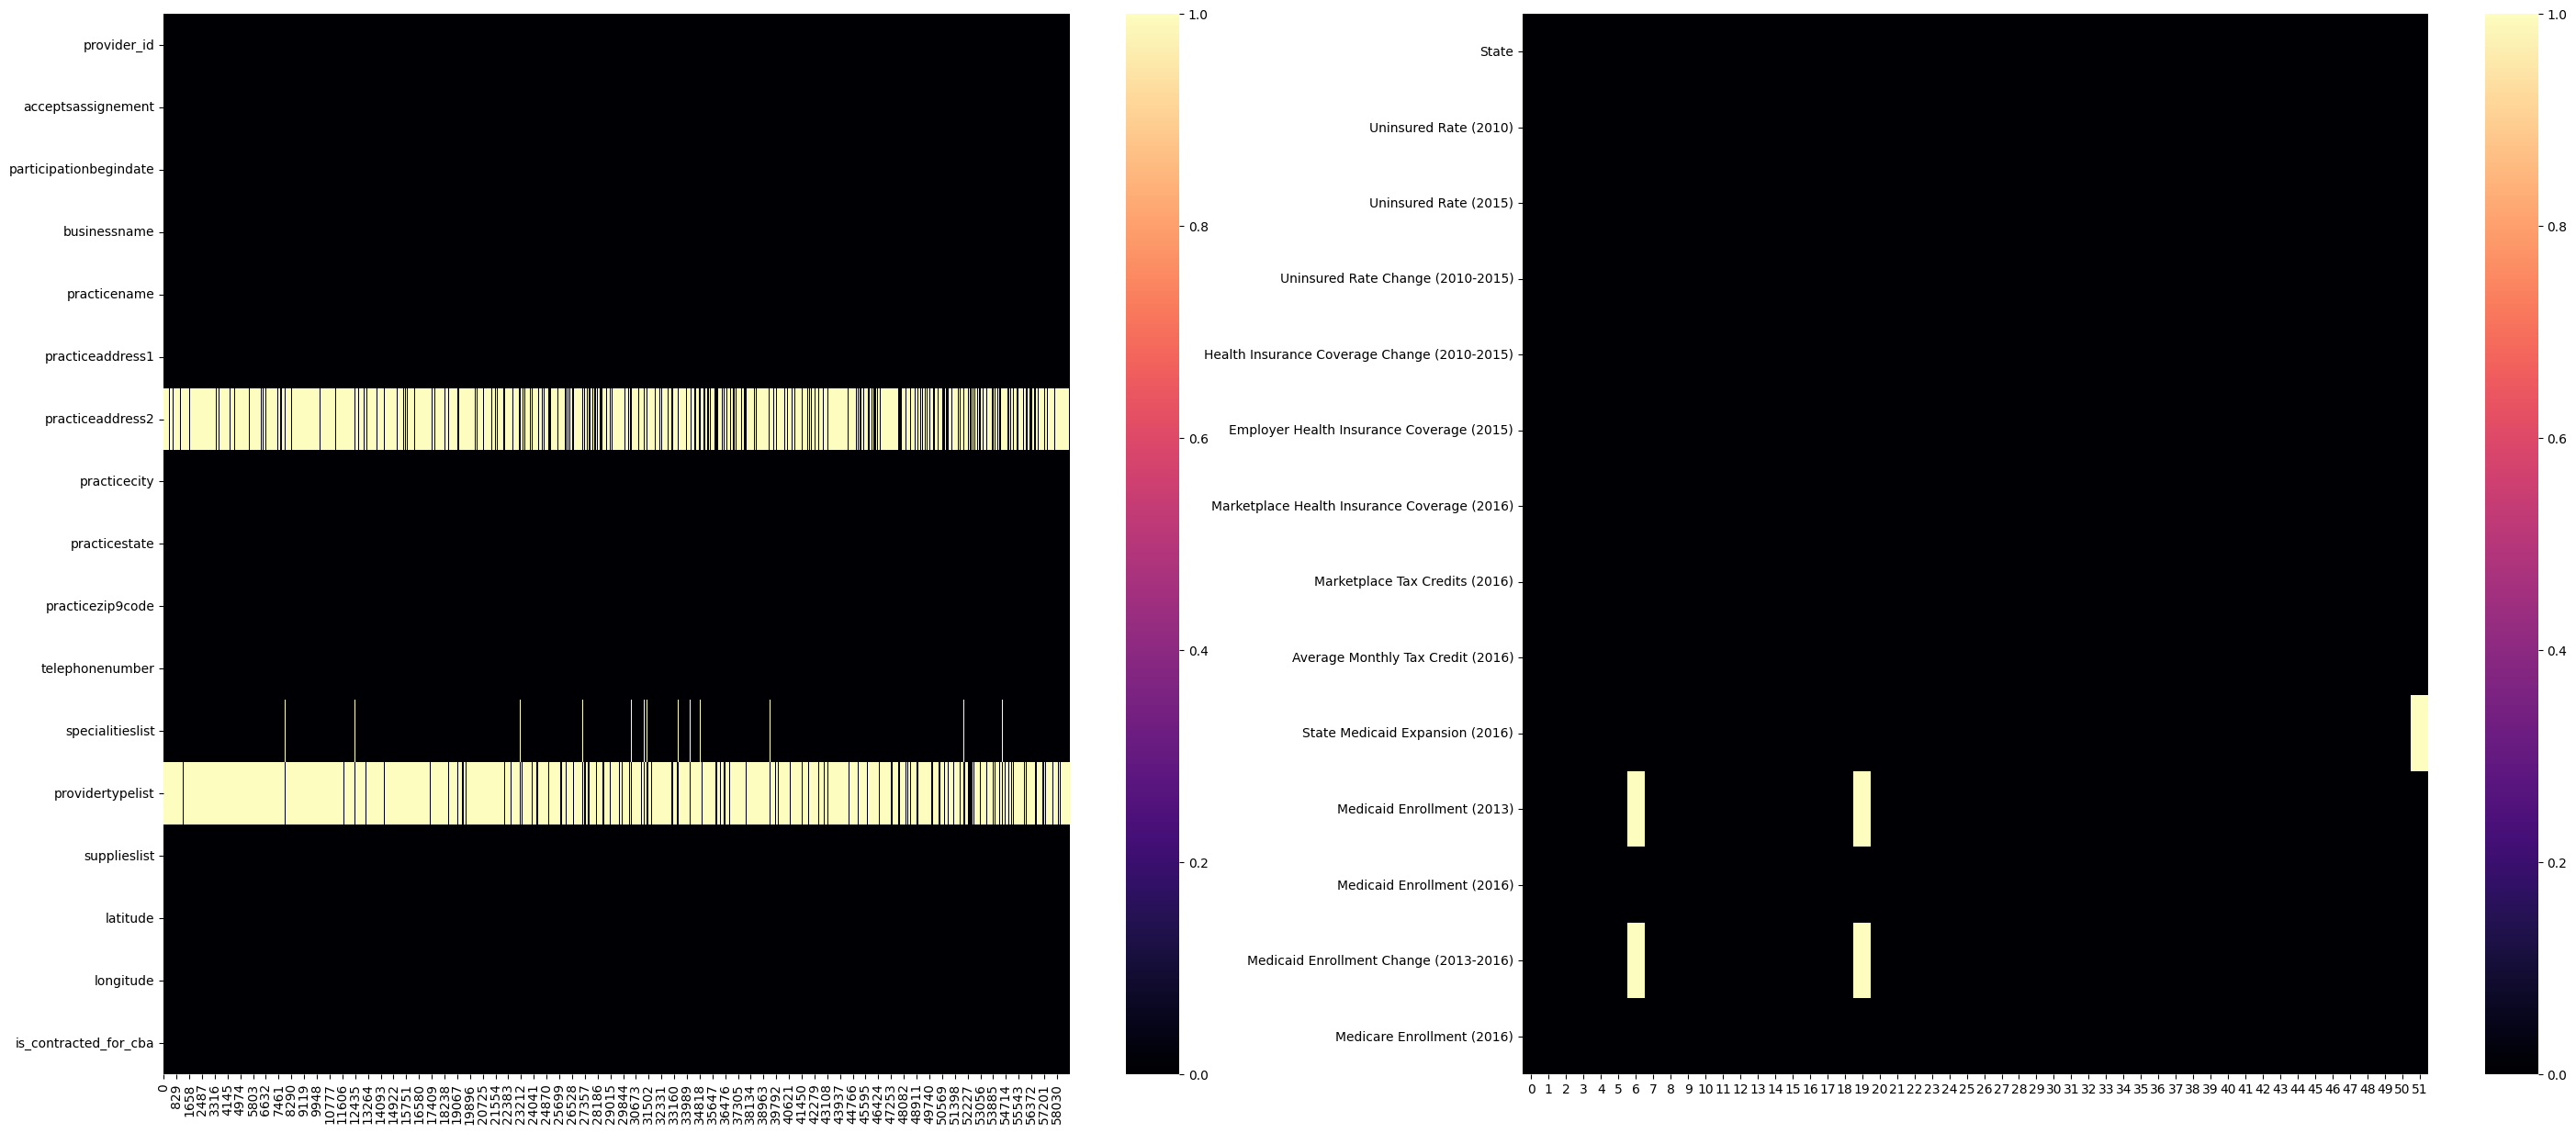

In [7]:
# Create heatmaps to show missing data in each dataset
fig, axes = plt.subplots(1, 2, figsize = (35, 15))
sns.heatmap(suppliers.isna().transpose(), cmap = "magma", ax = axes[0])
sns.heatmap(states.isna().transpose(), cmap = "magma", ax = axes[1])
fig.show()

In [8]:
clean_suppliers = suppliers.copy(deep = True)
clean_suppliers = clean_suppliers.dropna(subset = ["specialitieslist", "supplieslist"]).reset_index(drop = True)

missing_cols = ["specialitieslist", "supplieslist"]
clean_suppliers[missing_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58065 entries, 0 to 58064
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   specialitieslist  58065 non-null  object
 1   supplieslist      58065 non-null  object
dtypes: object(2)
memory usage: 907.4+ KB


In [9]:
clean_states = states.copy(deep = True)

X = clean_states[["Medicaid Enrollment (2016)", "Medicare Enrollment (2016)"]]
y = clean_states["Medicaid Enrollment (2013)"]
X_train = X.drop([6, 19])
X_test = X.iloc[[6, 19]]
y_train = y.drop([6, 19])
y_test = y.iloc[[6, 19]]

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

clean_states.loc[6, "Medicaid Enrollment (2013)"] = int(y_pred[0])
clean_states.loc[19, "Medicaid Enrollment (2013)"] = int(y_pred[1])
clean_states.loc[6, "Medicaid Enrollment Change (2013-2016)"] = clean_states.loc[6, "Medicaid Enrollment (2016)"] - clean_states.loc[6, "Medicaid Enrollment (2013)"]
clean_states.loc[19, "Medicaid Enrollment Change (2013-2016)"] = clean_states.loc[19, "Medicaid Enrollment (2016)"] - clean_states.loc[19, "Medicaid Enrollment (2013)"]

clean_states[["State", "State Medicaid Expansion (2016)", "Medicaid Enrollment (2013)", "Medicaid Enrollment Change (2013-2016)"]].loc[[6, 19, 51],]

State State Medicaid Expansion (2016)  Medicaid Enrollment (2013)  \
6     Connecticut                            True                    619125.0   
19         Maine                            False                    257445.0   
51  United States                             NaN                  56392477.0   

    Medicaid Enrollment Change (2013-2016)  
6                                 142012.0  
19                                 15715.0  
51                              16106157.0

### Duplicate Entries

In [10]:
clean_suppliers[clean_suppliers.duplicated()]

Empty DataFrame
Columns: [provider_id, acceptsassignement, participationbegindate, businessname, practicename, practiceaddress1, practiceaddress2, practicecity, practicestate, practicezip9code, telephonenumber, specialitieslist, providertypelist, supplieslist, latitude, longitude, is_contracted_for_cba]
Index: []

In [11]:
clean_states[clean_states.duplicated()]

Empty DataFrame
Columns: [State, Uninsured Rate (2010), Uninsured Rate (2015), Uninsured Rate Change (2010-2015), Health Insurance Coverage Change (2010-2015), Employer Health Insurance Coverage (2015), Marketplace Health Insurance Coverage (2016), Marketplace Tax Credits (2016), Average Monthly Tax Credit (2016), State Medicaid Expansion (2016), Medicaid Enrollment (2013), Medicaid Enrollment (2016), Medicaid Enrollment Change (2013-2016), Medicare Enrollment (2016)]
Index: []

In [12]:
data = {
    "Dataset": ["Medical Equipment Suppliers", "Medical Equipment Suppliers", "Health Insurance Coverage", "Health Insurance Coverage"],
    "Record Type": ["Total", "Unique", "Total", "Unique"],
    "Count": [len(clean_suppliers), len(clean_suppliers.drop_duplicates()), len(clean_states), len(clean_states.drop_duplicates())],
}
missing_df = pd.DataFrame(data)
fig = px.bar(missing_df, x = "Record Type", y = "Count", color = "Dataset", barmode = "group", text = "Count", color_discrete_map = {"Medical Equipment Suppliers": "PaleGoldenRod", "Health Insurance Coverage": "Purple"})
fig.show()

### Data Structuring

In [13]:
split_suppliers = suppliers.copy(deep = True)
split_suppliers = split_suppliers.dropna(subset = ["specialitieslist", "supplieslist"]).reset_index(drop = True)
split_suppliers["specialitieslist"] = split_suppliers["specialitieslist"].str.split("|")
split_suppliers["supplieslist"] = split_suppliers["supplieslist"].str.split("|")

In [14]:
specialities = set()
for row in split_suppliers.itertuples():
    row_specialities = row.specialitieslist
    for supply in row_specialities:
        specialities.add(supply)
        
supplies = set()
for row in split_suppliers.itertuples():
    row_supplies = row.supplieslist
    for supply in row_supplies:
        supplies.add(supply)

In [15]:
# This code block was generated with assistance from ChatGPT (Version 5), accessed on 10/13/2025
mlb = MultiLabelBinarizer()
encoded_specialities = pd.DataFrame(
    mlb.fit_transform(split_suppliers["specialitieslist"]),
    columns = mlb.classes_,
    index = split_suppliers.index
)
encoded_supplies = pd.DataFrame(
    mlb.fit_transform(split_suppliers["supplieslist"]),
    columns = mlb.classes_,
    index = split_suppliers.index
)

encoded_suppliers = pd.concat([split_suppliers, encoded_specialities, encoded_supplies], axis = 1)
encoded_suppliers.head()

provider_id  acceptsassignement participationbegindate  \
0     20615807                True             2025-07-07   
1     20615153                True             2025-07-07   
2     20615219                True             2025-07-07   
3     20616047                True             2025-07-07   
4     20615921                True             2025-07-07   

                     businessname                    practicename  \
0  SMITHS FOOD & DRUG CENTERS INC            SMITHS PHARMACY #354   
1  SMITHS FOOD & DRUG CENTERS INC             SMITHS PHARMACY #47   
2  SMITHS FOOD & DRUG CENTERS INC  FRY'S FOOD AND DRUG STORE #116   
3  SMITHS FOOD & DRUG CENTERS INC         FRY'S FOOD AND DRUG #48   
4  SMITHS FOOD & DRUG CENTERS INC         FRYS FOOD AND DRUG #112   

       practiceaddress1 practiceaddress2 practicecity practicestate  \
0    3850 E FLAMINGO RD              NaN    LAS VEGAS            NV   
1         2039 E 9400 S              NaN        SANDY            UT   
2           950 FAIR ST              NaN     PRESCOTT            AZ   
3  1385 E FLORENCE BLVD              NaN  CASA GRANDE            AZ   
4      1575 N DYSART RD              NaN     AVONDALE            AZ   

   practicezip9code  ...  Walkers Wheelchair Seating/Cushions  \
0         891216227  ...        1                           0   
1         840933100  ...        1                           0   
2         863051806  ...        1                           0   
3         851225318  ...        1                           0   
4         853231204  ...        1                           0   

  Wheelchairs (Complex Rehab Manual Rel Accessories)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

  Wheelchairs (Complex Rehab Power Rel Accessories)  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Wheelchairs (Complex Rehabilitative Manual)  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Wheelchairs (Complex Rehabilitative Power)  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Wheelchairs (Standard Manual Related Accessories)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Wheelchairs (Standard Manual)  \
0                              0   
1                              0   
2                              0   
3                              0   
4                              0   

   Wheelchairs (Standard Power Related Accessories)  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Wheelchairs (Standard Power)  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 123 columns]

In [16]:
# Fix data types for variables in clean_states
clean_states["State"] = clean_states["State"].str.strip()

# Percents
    # Uninsured Rate (2010)
clean_states["Uninsured Rate (2010)"] = clean_states["Uninsured Rate (2010)"].str.rstrip("%").astype("float") / 100.0
    # Uninsured Rate (2015)
clean_states["Uninsured Rate (2015)"] = clean_states["Uninsured Rate (2015)"].str.rstrip("%").astype("float") / 100.0
    # Uninsured Rate Change (2010-2015)
clean_states["Uninsured Rate Change (2010-2015)"] = clean_states["Uninsured Rate Change (2010-2015)"].str.rstrip()
clean_states["Uninsured Rate Change (2010-2015)"] = clean_states["Uninsured Rate Change (2010-2015)"].str.rstrip("%").astype("float") / 100.0
    
# Dollar signs
    # Average Monthly Tax Credit (2016)	
clean_states["Average Monthly Tax Credit (2016)"] = clean_states["Average Monthly Tax Credit (2016)"].str.lstrip("$").astype("int")

# Floats to ints
    # Medicaid Enrollment (2013)	
clean_states["Medicaid Enrollment (2013)"] = clean_states["Medicaid Enrollment (2013)"].astype("int")
    # Medicaid Enrollment Change (2013-2016)
clean_states["Medicaid Enrollment Change (2013-2016)"] = clean_states["Medicaid Enrollment Change (2013-2016)"].astype("int")

## EDA

### Supply and Speciality Combinations

In [17]:
chosen_speciality = "Pharmacy"
chosen_supply = "Walkers"

result_suppliers = encoded_suppliers[(encoded_suppliers[chosen_speciality] == True) & (encoded_suppliers[chosen_supply] == True)]
print(f"\n{len(result_suppliers)} results:")
fig = px.histogram(result_suppliers, x = "acceptsassignement", color = "acceptsassignement", color_discrete_map = {0: "IndianRed", 1: "Green"})
fig.show()


15885 results:


In [18]:
fig = px.histogram(result_suppliers, x = "practicestate", color = "acceptsassignement", color_discrete_map = {0: "IndianRed", 1: "Green"}, barmode = "group")
fig.show()

### Suppliers by State

In [19]:
state_abbrevs = {
    "AK": "Alaska",
    "AL": "Alabama",
    "AR": "Arkansas",
    "AZ": "Arizona",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DC": "District of Columbia",
    "DE": "Delaware",
    "FL": "Florida",
    "GA": "Georgia",
    "HI": "Hawaii",
    "IA": "Iowa",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "MA": "Massachusetts",
    "MD": "Maryland",
    "ME": "Maine",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MO": "Missouri",
    "MS": "Mississippi",
    "MT": "Montana",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "NE": "Nebraska",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NV": "Nevada",
    "NY": "New York",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PA": "Pennsylvania",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VA": "Virginia",
    "VT": "Vermont",
    "WA": "Washington",
    "WI": "Wisconsin",
    "WV": "West Virginia",
    "WY": "Wyoming"
    }

In [20]:
supplier_state_counts = {}
assigned_supplier_state_counts = {}
nonassigned_supplier_state_counts = {}

begin_date = datetime(2010, 1, 1)
end_date = datetime(2016, 12, 31)

In [21]:
for i in range(len(encoded_suppliers)):
    state = encoded_suppliers.loc[i, "practicestate"]
    if state in state_abbrevs.keys() and encoded_suppliers.loc[i, "participationbegindate"] >= begin_date and encoded_suppliers.loc[i, "participationbegindate"] <= end_date:
        full_state = state_abbrevs[state]
        if full_state not in supplier_state_counts.keys():
            supplier_state_counts[full_state] = 1
            if encoded_suppliers.loc[i, "acceptsassignement"]:
                if full_state not in assigned_supplier_state_counts.keys():
                    assigned_supplier_state_counts[full_state] = 1
                else:
                    assigned_supplier_state_counts[full_state] += 1
            else:
                if full_state not in nonassigned_supplier_state_counts.keys():
                    nonassigned_supplier_state_counts[full_state] = 1
                else:
                    nonassigned_supplier_state_counts[full_state] += 1
        else:
            supplier_state_counts[full_state] += 1
            if encoded_suppliers.loc[i, "acceptsassignement"]:
                if full_state not in assigned_supplier_state_counts.keys():
                    assigned_supplier_state_counts[full_state] = 1
                else:
                    assigned_supplier_state_counts[full_state] += 1
            else:
                if full_state not in nonassigned_supplier_state_counts.keys():
                    nonassigned_supplier_state_counts[full_state] = 1
                else:
                    nonassigned_supplier_state_counts[full_state] += 1

In [22]:
for i in range(len(clean_states)):
    state = clean_states.loc[i, "State"]
    if state in supplier_state_counts.keys():
        clean_states.loc[i, "Supplier Count (2010-2016)"] = int(supplier_state_counts[state])
        clean_states.loc[i, "Assignment-Accepting Supplier Count (2010-2016)"] = int(assigned_supplier_state_counts[state])
        clean_states.loc[i, "Assignment-Rejecting Supplier Count (2010-2016)"] = int(nonassigned_supplier_state_counts[state])
        clean_states.loc[i, "Assignment Acceptance Ratio"] = float(assigned_supplier_state_counts[state]) / nonassigned_supplier_state_counts[state]

In [23]:
clean_states[["State", "Assignment-Accepting Supplier Count (2010-2016)", "Assignment-Rejecting Supplier Count (2010-2016)", "Assignment Acceptance Ratio"]]

State  Assignment-Accepting Supplier Count (2010-2016)  \
0                Alabama                                             37.0   
1                 Alaska                                              8.0   
2                Arizona                                            145.0   
3               Arkansas                                             37.0   
4             California                                            370.0   
5               Colorado                                             45.0   
6            Connecticut                                             43.0   
7               Delaware                                             15.0   
8   District of Columbia                                              9.0   
9                Florida                                            989.0   
10               Georgia                                            287.0   
11                Hawaii                                             13.0   
12                 Idaho                                             20.0   
13              Illinois                                            143.0   
14               Indiana                                            113.0   
15                  Iowa                                             58.0   
16                Kansas                                             34.0   
17              Kentucky                                             85.0   
18             Louisiana                                             29.0   
19                 Maine                                             15.0   
20              Maryland                                            178.0   
21         Massachusetts                                             55.0   
22              Michigan                                             86.0   
23             Minnesota                                            157.0   
24           Mississippi                                             40.0   
25              Missouri                                             83.0   
26               Montana                                             26.0   
27              Nebraska                                             35.0   
28                Nevada                                             23.0   
29         New Hampshire                                              7.0   
30            New Jersey                                            205.0   
31            New Mexico                                             10.0   
32              New York                                            353.0   
33        North Carolina                                            304.0   
34          North Dakota                                             15.0   
35                  Ohio                                            190.0   
36              Oklahoma                                             89.0   
37                Oregon                                             46.0   
38          Pennsylvania                                            210.0   
39          Rhode Island                                              6.0   
40        South Carolina                                            122.0   
41          South Dakota                                             47.0   
42             Tennessee                                             67.0   
43                 Texas                                            476.0   
44                  Utah                                             30.0   
45               Vermont                                              3.0   
46              Virginia                                            180.0   
47            Washington                                             70.0   
48         West Virginia                                             16.0   
49             Wisconsin                                             74.0   
50               Wyoming                                             17.0   
51         Unit

In [34]:
fig = px.histogram(clean_states, x = "State", y = "Assignment Acceptance Ratio")
fig.add_hline(y = clean_states["Assignment Acceptance Ratio"].mean(), line_color = "red")
fig.show()

In [29]:
fig = px.scatter(clean_states, x = "Supplier Count (2010-2016)", y = "Medicaid Enrollment Change (2013-2016)", trendline = "ols")
fig.show()

In [36]:
fig = px.scatter(clean_states, x = "Supplier Count (2010-2016)", y = "Uninsured Rate Change (2010-2015)", trendline = "ols")
fig.add_hline(y = 0)

### Key Variables

## Map

In [27]:
selected_specialities = ["Pharmacy"]
selected_supplies = []

selected_suppliers = encoded_suppliers.copy(deep = True)
if len(selected_specialities):
    selected_suppliers = selected_suppliers[selected_suppliers[selected_specialities[0]] == True]

px.scatter_map(selected_suppliers,
                lat = "latitude",
                lon = "longitude",
                hover_name = "practicename",
                hover_data = ["practicecity", "practicestate", "specialitieslist"],
                color = "acceptsassignement",
                color_discrete_map = {0: "IndianRed", 1: "Green"},
                map_style = "carto-darkmatter",
                zoom = 2.5,
                width = 1400,
                height = 800)